In [10]:
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (24,5)
import seaborn as sns
sns.set()
sns.set(font_scale=1.75)
import scipy

In [11]:
cols = ["test", "map"]  + [50000,    100000,   150000,   200000,   250000,   300000,   350000,   400000,   500000,  600000,  700000,
       800000,   900000,   1000000, 2000000, 3000000]
data = pd.read_csv("results.csv", header=None)
data.columns = cols
tests = data["test"].unique()
maps = data["map"].unique()
data_dict = dict()
for t in tests:
    for m in maps:
        data_dict[(t,m)] = data[(data["map"] == m) & (data["test"] == t)]     
for k,v in data_dict.items():
    # keep only the ones that are within +3 to -3 standard deviations
    data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)


<ipython-input-11-f08af3368813>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
<ipython-input-11-f08af3368813>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
<ipython-input-11-f08af3368813>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["tes

In [12]:
data.describe()

,50000,100000,150000,200000,250000,300000,350000,400000,500000,600000,700000,800000,900000,1000000,2000000,3000000
count,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.0000,160.000000,160.000000,160.000000
mean,110.012500,130.40000,136.575000,143.281250,149.656250,148.843750,152.981250,154.412500,157.662500,161.250000,162.806250,166.42500,167.4625,169.218750,187.225000,200.093750
std,72.361947,61.35362,59.669588,61.224114,63.500908,59.687925,60.334442,60.663355,61.020554,62.273691,62.368906,63.01368,65.0249,64.679245,76.158057,82.655213
min,22.000000,44.00000,52.000000,59.000000,63.000000,65.000000,66.000000,69.000000,70.000000,74.000000,75.000000,76.00000,77.0000,76.000000,79.000000,84.000000
25%,48.000000,72.00000,80.000000,86.000000,90.750000,92.000000,95.000000,96.750000,100.750000,101.000000,101.750000,106.50000,104.7500,104.000000,111.000000,117.750000
50%,92.500000,149.50000,155.000000,137.000000,157.000000,145.000000,151.500000,155.000000,147.000000,161.000000,157.500000,163.00000,164.0000,185.500000,191.000000,203.500000
75%,164.750000,183.00000,188.000000,193.000000,200.250000,198.000000,206.000000,206.000000,209.000000,214.250000,217.250000,221.00000,222.0000,225.000000,255.750000,274.000000
max,289.000000,360.00000,281.000000,275.000000,415.000000,258.000000,271.000000,324.000000,285.000000,293.000000,296.000000,287.00000,293.0000,282.000000,319.000000,341.000000


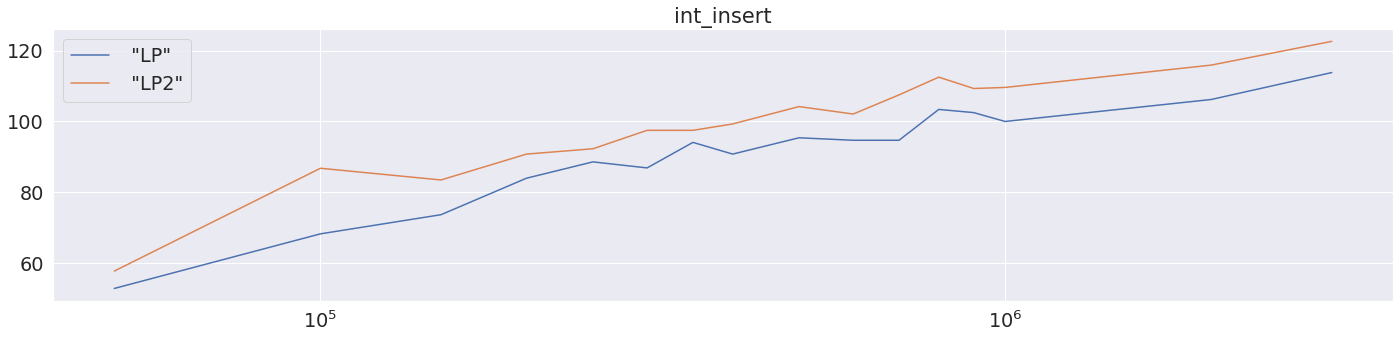

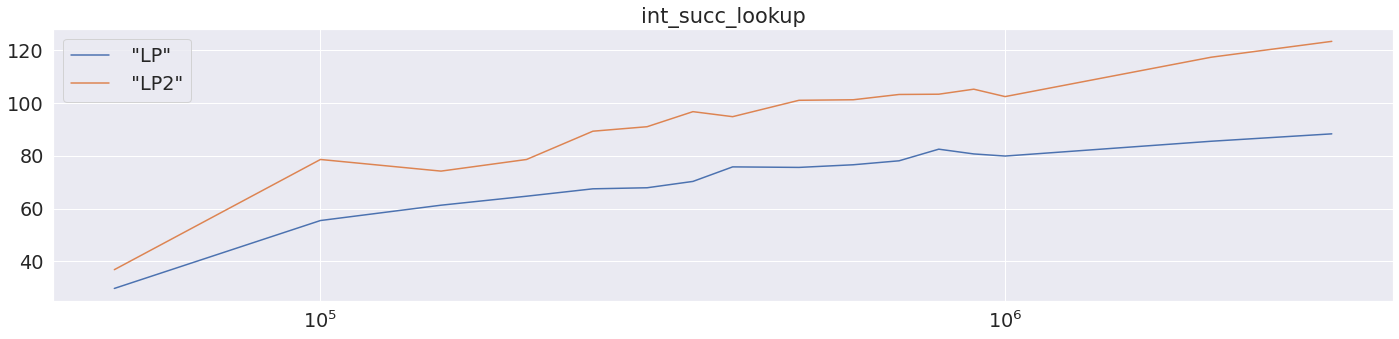

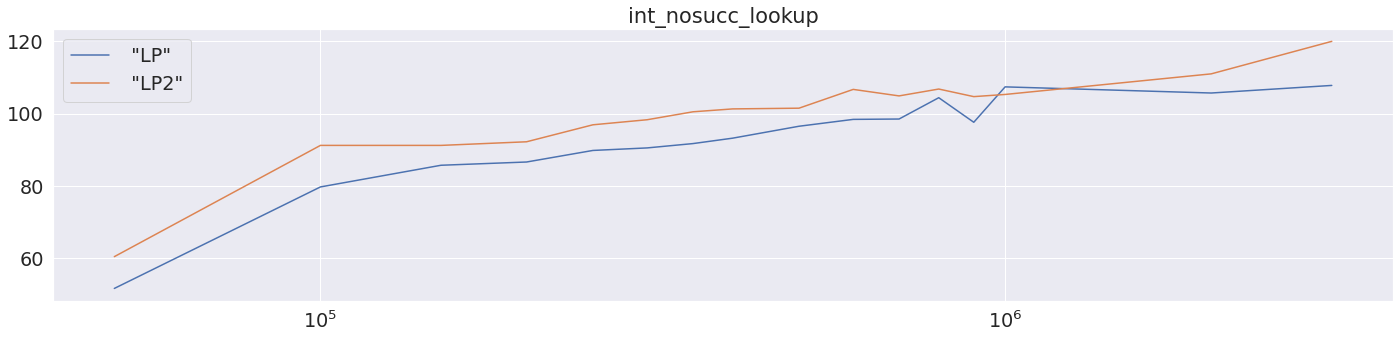

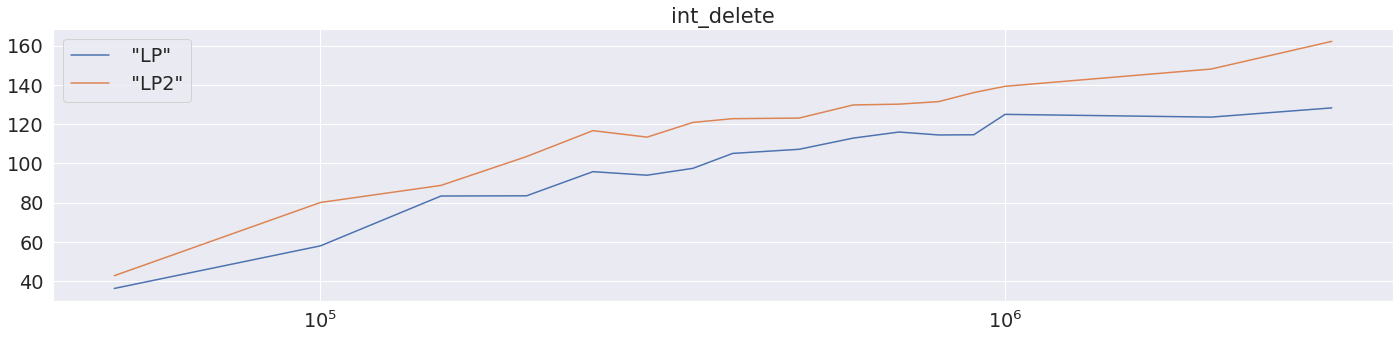

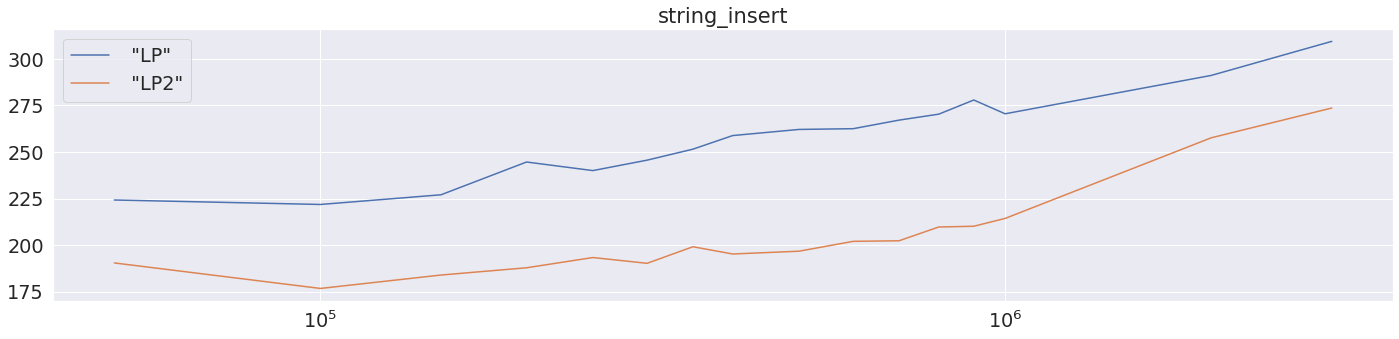

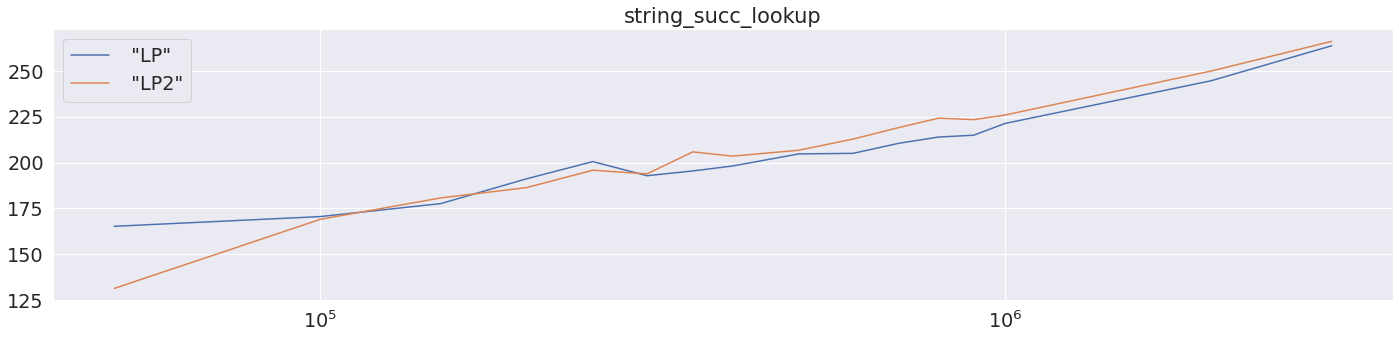

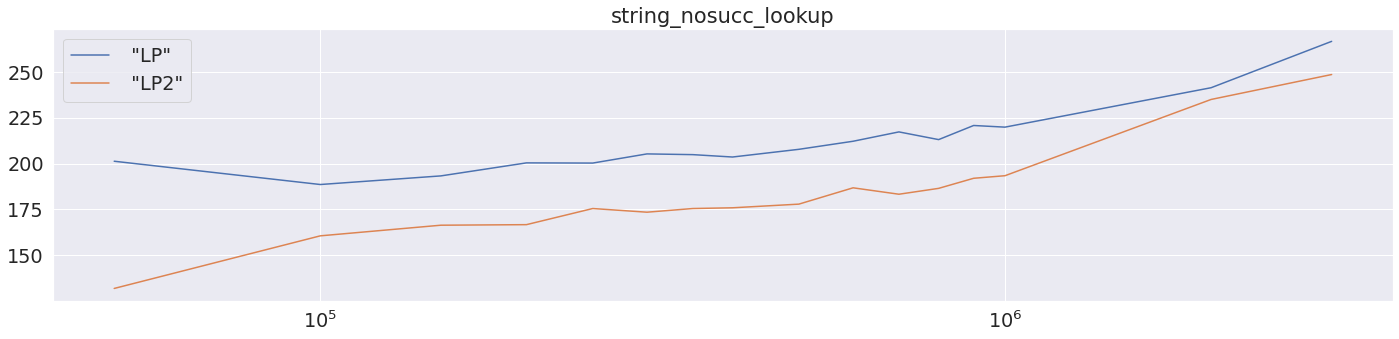

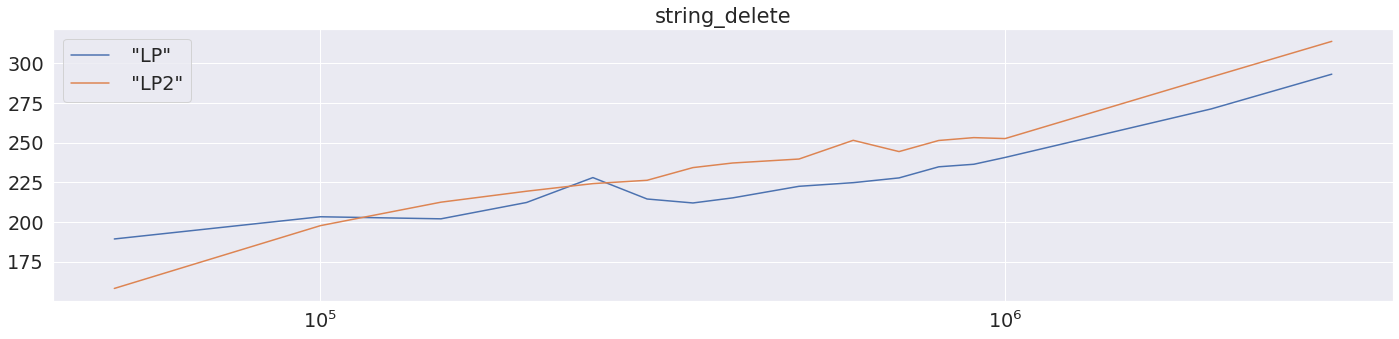

In [13]:
def gen_graph(test):
    badtest= ["int_insert", "string_insert"]
    for m in maps:
        mdata = data_dict[(test,m)].mean()
        sns.lineplot(x=mdata.index, y=mdata, label=m)
    plt.title(test)
    plt.xscale("log")
    plt.show()
    
# print(maps)
for i in tests:
    gen_graph(i)

# This is the same as above, but i compiled with gcc instead to see if the speeds differed if i used a different compiler
